# Installation

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

# 1.Importing

In [53]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 2.Load Dataset

In [6]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The dataset contains 150 samples of iris flowers, with three species:

- Iris setosa
- Iris versicolor
- Iris virginica

The target variable consists of three classes corresponding to the three iris species, making it a multiclass classification problem.

# 3.Extract Features

In [42]:
X = df[['petal_length']].values  # Features
y = df['petal_width'].values    # Target

Models like `LinearRegression` are built to handle multiple features (columns) and expect the input to have a 2D structure

# 4.Preprocess Data

# 5.Split the Data into Training and Test Sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6.Create Model

In [44]:
model = LinearRegression()

# 7.Train the Model

In [45]:
model.fit(X_train, y_train)

LinearRegression()

# 8.Make Predictions

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([1.58188752, 0.3419958 , 2.49114145, 1.49922807, 1.62321724,
       0.25933635, 1.12726056, 1.74720642, 1.49922807, 1.25124973,
       1.74720642, 0.21800663, 0.1766769 , 0.25933635, 0.25933635,
       1.58188752, 2.03651448, 1.25124973, 1.49922807, 1.95385504,
       0.30066608, 1.66454697, 0.30066608, 1.95385504, 2.28449283,
       1.78853614, 2.03651448, 2.07784421, 0.21800663, 0.30066608,
       0.05268773, 0.25933635, 1.45789835, 0.30066608, 0.1766769 ,
       1.70587669, 1.49922807, 0.25933635, 0.21800663, 0.25933635,
       1.74720642, 1.49922807, 1.58188752, 0.1766769 , 0.25933635])

## 8.1 Custom Prediction

In [48]:
prediction = model.predict(np.array([[5.5]]))
print(f"Predicted sepal width: {prediction[0]}")

Predicted sepal width: 1.912525311651643


## 8.2 Why Logistic Regression used for?
Linear regression is used when the output (or target variable) is continuous. It tries to model the relationship between input features and a continuous output by fitting a straight line (or hyperplane in higher dimensions) to the data.

Linear regression works well when the output is a real number and can take any value within a range.

# 9.Evaluate the model

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.15647051371014092
Mean Squared Error (MSE): 0.04206730919499318
Root Mean Squared Error (RMSE): 0.20510316719883478
R² Score: 0.9271098389904927


# 10.Visualization

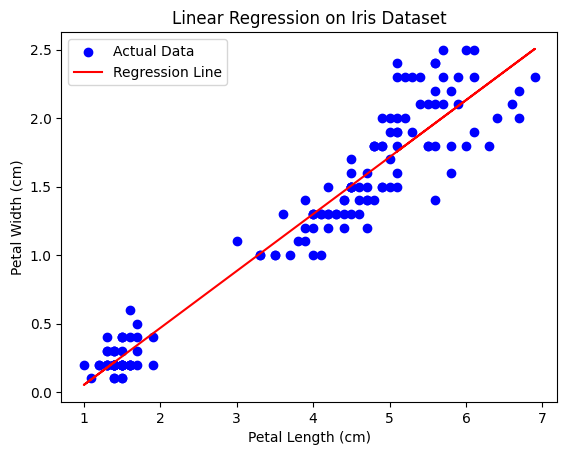

In [40]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Tree Regression on Iris Dataset')
plt.legend()
plt.show()

# 11.Regression Line

In [54]:
beta1 = model.coef_[0]   # Slope
beta0 = model.intercept_  # Intercept
print(f"Regression Line Equation: Y = {beta0} + {beta1} * X")

Regression Line Equation: Y = -0.3606095070439961 + 0.41329723976284344 * X


# 12.Residuals

In [56]:
residuals = y_test - y_pred
ssr = np.sum(residuals**2)

# print("Residuals: ", residuals)
print(f"Sum of Squared Residuals (SSR): {ssr}")

Sum of Squared Residuals (SSR): 6.310096379248977
